In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
files = glob('seoul_data/*.csv')
files

['seoul_data\\상권_추정매출.csv(2017_2021).csv',
 'seoul_data\\상권배후지_소득소비.csv',
 'seoul_data\\서울_상권_점포_수.csv',
 'seoul_data\\서울_상주배후지_상주인구.csv',
 'seoul_data\\서울특별시_상권배후지_생활인구.csv',
 'seoul_data\\서울특별시_상권배후지_아파트.csv',
 'seoul_data\\서울특별시_상권배후지_직장인구.csv',
 'seoul_data\\서울특별시_상권배후지_집객시설.csv',
 'seoul_data\\서울특별시_행정동별_상권변화지표.csv',
 'seoul_data\\자치구별_상권_변화지표.csv']

In [3]:
df = pd.read_csv(files[0])
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,구,동,주소,lat,lot
0,2017,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,816890247,28082,...,202112,196193,456641,11110,11110560,종로구,평창동,종로구 평창동,37.611446,126.971968
1,2017,1,A,골목상권,2110001,이북5도청사,CS100007,치킨전문점,19223252,517,...,202112,196193,456641,11110,11110560,종로구,평창동,종로구 평창동,37.611446,126.971968
2,2017,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,75483418,5755,...,202112,196193,456641,11110,11110560,종로구,평창동,종로구 평창동,37.611446,126.971968
3,2017,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,46115226,1306,...,202112,196193,456641,11110,11110560,종로구,평창동,종로구 평창동,37.611446,126.971968
4,2017,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,22041409,1607,...,202112,196193,456641,11110,11110560,종로구,평창동,종로구 평창동,37.611446,126.971968


In [4]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [6]:
cols = ['기준_년_코드', '구', '서비스_업종_코드_명', '분기당_매출_금액', '점포수', '주소', 'lat', 'lot']

In [7]:
df = df[df['기준_년_코드'] > 2020]
df.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,구,동,주소,lat,lot
790195,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,10000000,94,...,202112,205310,445727,11680,11680580,강남구,삼성1동,강남구 삼성1동,37.514562,127.060389
790201,2021,1,R,전통시장,2130027,명동지하쇼핑센터(소공동지하쇼핑센터),CS100010,커피-음료,207645990,37768,...,202112,198361,451573,11140,11140520,중구,소공동,중구 소공동,37.563659,126.979496
790202,2021,2,R,전통시장,2130027,명동지하쇼핑센터(소공동지하쇼핑센터),CS100010,커피-음료,288964435,53227,...,202112,198361,451573,11140,11140520,중구,소공동,중구 소공동,37.563659,126.979496
790203,2021,3,R,전통시장,2130027,명동지하쇼핑센터(소공동지하쇼핑센터),CS100010,커피-음료,308293816,56307,...,202112,198361,451573,11140,11140520,중구,소공동,중구 소공동,37.563659,126.979496
790204,2021,4,R,전통시장,2130027,명동지하쇼핑센터(소공동지하쇼핑센터),CS100010,커피-음료,267854235,49308,...,202112,198361,451573,11140,11140520,중구,소공동,중구 소공동,37.563659,126.979496


In [8]:
df = df[cols]
df

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot
219,2021,종로구,한식음식점,626851391,28,종로구 평창동,37.611446,126.971968
220,2021,종로구,분식전문점,122957138,9,종로구 평창동,37.611446,126.971968
221,2021,종로구,호프-간이주점,5093349,3,종로구 평창동,37.611446,126.971968
222,2021,종로구,커피-음료,13507733,5,종로구 평창동,37.611446,126.971968
223,2021,종로구,일반교습학원,37551380,3,종로구 평창동,37.611446,126.971968
...,...,...,...,...,...,...,...,...
790195,2021,강남구,전자상거래업,10000000,8,강남구 삼성1동,37.514562,127.060389
790201,2021,중구,커피-음료,207645990,3,중구 소공동,37.563659,126.979496
790202,2021,중구,커피-음료,288964435,3,중구 소공동,37.563659,126.979496
790203,2021,중구,커피-음료,308293816,3,중구 소공동,37.563659,126.979496


In [9]:
def get_mean_profit(service_name, gu_name):
    
    df_temp = df[df['서비스_업종_코드_명'].str.contains(service_name) & 
                df['구'].str.contains(gu_name)]
    mean_value = df_temp['분기당_매출_금액'].mean()
    return round(mean_value, 0) / 3

In [10]:
get_mean_profit('한식', '중구')

1101869607.6666667

In [11]:
service_name = input('선택 업종 작성해 주세요 : ')
gu_name = input('희망 구를 입력해 주세요 : ')
num = get_mean_profit(service_name, gu_name)
print(f'{gu_name}에서 {service_name} 업종의 현재 평균 매출은 {num:,} 원 입니다.')

선택 업종 작성해 주세요 : 
희망 구를 입력해 주세요 : 
에서  업종의 현재 평균 매출은 218,303,480.66666666 원 입니다.


In [12]:
df

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot
219,2021,종로구,한식음식점,626851391,28,종로구 평창동,37.611446,126.971968
220,2021,종로구,분식전문점,122957138,9,종로구 평창동,37.611446,126.971968
221,2021,종로구,호프-간이주점,5093349,3,종로구 평창동,37.611446,126.971968
222,2021,종로구,커피-음료,13507733,5,종로구 평창동,37.611446,126.971968
223,2021,종로구,일반교습학원,37551380,3,종로구 평창동,37.611446,126.971968
...,...,...,...,...,...,...,...,...
790195,2021,강남구,전자상거래업,10000000,8,강남구 삼성1동,37.514562,127.060389
790201,2021,중구,커피-음료,207645990,3,중구 소공동,37.563659,126.979496
790202,2021,중구,커피-음료,288964435,3,중구 소공동,37.563659,126.979496
790203,2021,중구,커피-음료,308293816,3,중구 소공동,37.563659,126.979496


In [13]:
df['서비스_업종_코드_명'].unique(), df['구'].unique()

(array(['한식음식점', '분식전문점', '호프-간이주점', '커피-음료', '일반교습학원', '당구장', '자동차수리',
        '여관', '노래방', '편의점', '육류판매', '운동/경기용품', '제과점', '치킨전문점', '외국어학원',
        '치과의원', '골프연습장', 'PC방', '미용실', '청과상', '의약품', '화장품', '철물점', '예술학원',
        '슈퍼마켓', '패스트푸드점', '스포츠 강습', '일반의원', '한의원', '네일숍', '세탁소', '미곡판매',
        '일반의류', '자동차미용', '반찬가게', '일식음식점', '양식음식점', '컴퓨터및주변장치판매', '핸드폰',
        '가방', '문구', '화초', '서적', '중식음식점', '스포츠클럽', '피부관리실', '시계및귀금속',
        '애완동물', '인테리어', '조명용품', '신발', '전자상거래업', '가전제품수리', '안경', '섬유제품',
        '의료기기', '가전제품', '가구', '고시원', '완구', '자전거 및 기타운송장비', '수산물판매',
        '부동산중개업'], dtype=object),
 array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '성북구', '중랑구', '강북구',
        '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
        '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object))

In [14]:
df['서비스_업종_코드_명'].nunique()*df['구'].nunique()

1575

In [15]:
df_1 = df[df['구'].str.contains('종로') & df['서비스_업종_코드_명'].str.contains('한식')].copy()
df_1

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot
219,2021,종로구,한식음식점,626851391,28,종로구 평창동,37.611446,126.971968
231,2021,종로구,한식음식점,741526186,26,종로구 평창동,37.611446,126.971968
243,2021,종로구,한식음식점,662559533,26,종로구 평창동,37.611446,126.971968
255,2021,종로구,한식음식점,727942726,28,종로구 평창동,37.611446,126.971968
604,2021,종로구,한식음식점,361894416,29,종로구 무악동,37.576720,126.958120
...,...,...,...,...,...,...,...,...
660891,2021,종로구,한식음식점,357619297,34,종로구 창신1동,37.573393,127.013514
661319,2021,종로구,한식음식점,878681956,37,종로구 숭인2동,37.575043,127.021318
661338,2021,종로구,한식음식점,1176329052,33,종로구 숭인2동,37.575043,127.021318
661358,2021,종로구,한식음식점,1006596136,33,종로구 숭인2동,37.575043,127.021318


In [16]:
df_1['점포당 평균매출'] = df_1['분기당_매출_금액'] / (df_1['점포수'] * 3)
df_1

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot,점포당 평균매출
219,2021,종로구,한식음식점,626851391,28,종로구 평창동,37.611446,126.971968,7.462517e+06
231,2021,종로구,한식음식점,741526186,26,종로구 평창동,37.611446,126.971968,9.506746e+06
243,2021,종로구,한식음식점,662559533,26,종로구 평창동,37.611446,126.971968,8.494353e+06
255,2021,종로구,한식음식점,727942726,28,종로구 평창동,37.611446,126.971968,8.665985e+06
604,2021,종로구,한식음식점,361894416,29,종로구 무악동,37.576720,126.958120,4.159706e+06
...,...,...,...,...,...,...,...,...,...
660891,2021,종로구,한식음식점,357619297,34,종로구 창신1동,37.573393,127.013514,3.506072e+06
661319,2021,종로구,한식음식점,878681956,37,종로구 숭인2동,37.575043,127.021318,7.916054e+06
661338,2021,종로구,한식음식점,1176329052,33,종로구 숭인2동,37.575043,127.021318,1.188211e+07
661358,2021,종로구,한식음식점,1006596136,33,종로구 숭인2동,37.575043,127.021318,1.016764e+07


In [17]:
num = round(df_1['점포당 평균매출'].mean(), 0)
print(f'{num:,} 만원')

7,196,051.0 만원


In [18]:
df['매장 월평균 매출'] = df['분기당_매출_금액'] / (df['점포수'] * 3)
df

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot,매장 월평균 매출
219,2021,종로구,한식음식점,626851391,28,종로구 평창동,37.611446,126.971968,7.462517e+06
220,2021,종로구,분식전문점,122957138,9,종로구 평창동,37.611446,126.971968,4.553968e+06
221,2021,종로구,호프-간이주점,5093349,3,종로구 평창동,37.611446,126.971968,5.659277e+05
222,2021,종로구,커피-음료,13507733,5,종로구 평창동,37.611446,126.971968,9.005155e+05
223,2021,종로구,일반교습학원,37551380,3,종로구 평창동,37.611446,126.971968,4.172376e+06
...,...,...,...,...,...,...,...,...,...
790195,2021,강남구,전자상거래업,10000000,8,강남구 삼성1동,37.514562,127.060389,4.166667e+05
790201,2021,중구,커피-음료,207645990,3,중구 소공동,37.563659,126.979496,2.307178e+07
790202,2021,중구,커피-음료,288964435,3,중구 소공동,37.563659,126.979496,3.210716e+07
790203,2021,중구,커피-음료,308293816,3,중구 소공동,37.563659,126.979496,3.425487e+07


In [19]:
def get_mean_profit2(service_name, gu_name):
    
    df_temp = df[df['서비스_업종_코드_명'].str.contains(service_name) & 
                df['구'].str.contains(gu_name)]
    mean_value = df_temp['매장 월평균 매출'].mean()
    return round(mean_value, 0)

In [27]:
service_name = input('선택 업종 작성해 주세요 : ')
gu_name = input('희망 구를 입력해 주세요 : ')
num = get_mean_profit2(service_name, gu_name)
print(f'{gu_name}에서 {service_name} 업종의 현재 월평균 매출은 {num:,} 원 입니다.')

선택 업종 작성해 주세요 : 커피
희망 구를 입력해 주세요 : 강남
강남에서 커피 업종의 현재 월평균 매출은 7,358,828.0 원 입니다.


In [21]:
df = df.sort_values(by='구')
df

,기준_년_코드,구,서비스_업종_코드_명,분기당_매출_금액,점포수,주소,lat,lot,매장 월평균 매출
400383,2021,강남구,한식음식점,55953610,6,강남구 역삼1동,37.499338,127.032210,3.108534e+06
610496,2021,강남구,치킨전문점,43991029,3,강남구 압구정동,37.532109,127.030016,4.887892e+06
610495,2021,강남구,패스트푸드점,67066466,3,강남구 압구정동,37.532109,127.030016,7.451830e+06
610494,2021,강남구,양식음식점,4009837035,35,강남구 압구정동,37.532109,127.030016,3.818892e+07
610493,2021,강남구,일식음식점,584132027,9,강남구 압구정동,37.532109,127.030016,2.163452e+07
...,...,...,...,...,...,...,...,...,...
96753,2021,중랑구,분식전문점,5805351,3,중랑구 면목4동,37.574040,127.085312,6.450390e+05
96754,2021,중랑구,호프-간이주점,19146429,17,중랑구 면목4동,37.574040,127.085312,3.754202e+05
96755,2021,중랑구,일반교습학원,128269415,9,중랑구 면목4동,37.574040,127.085312,4.750719e+06
96743,2021,중랑구,편의점,677742823,9,중랑구 면목4동,37.574040,127.085312,2.510159e+07


In [28]:
def get_profit_top(service_name):
    
    df_temp = pd.DataFrame()
    df_service = df[df['서비스_업종_코드_명'].str.contains(service_name)]
    for gu in df['구'].unique():
        df_temp.loc[0, gu] = round(df_service[df_service['구'] == gu]['매장 월평균 매출'].mean(), 0)
    
    return df_temp.T.sort_values(by=0, ascending = True).tail().plot(kind='barh', title=f'{service_name} 업종 월평균 매출 top5 구')

원하시는 업종을 선택해 주세요 : 한식


<AxesSubplot:title={'center':'한식 업종 월평균 매출 top5 구'}>

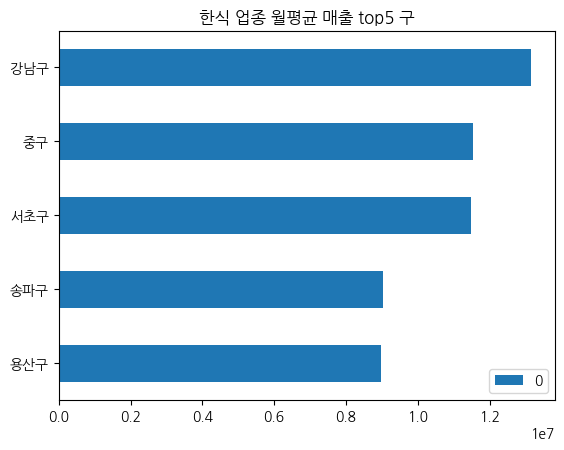

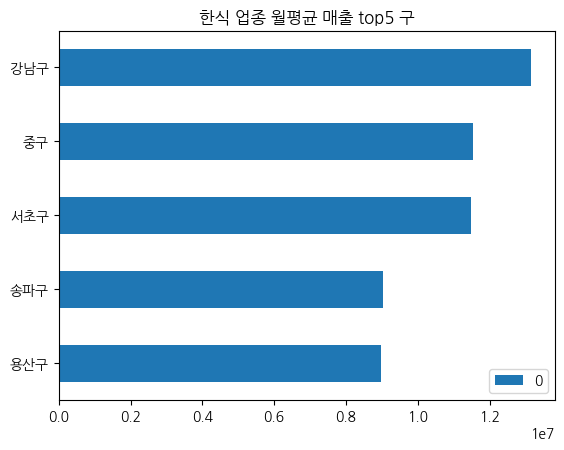

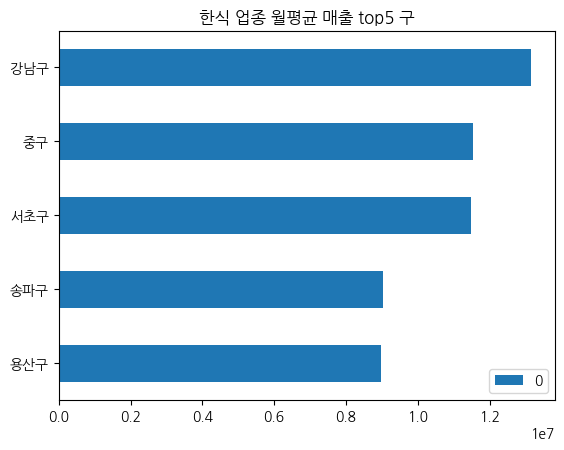

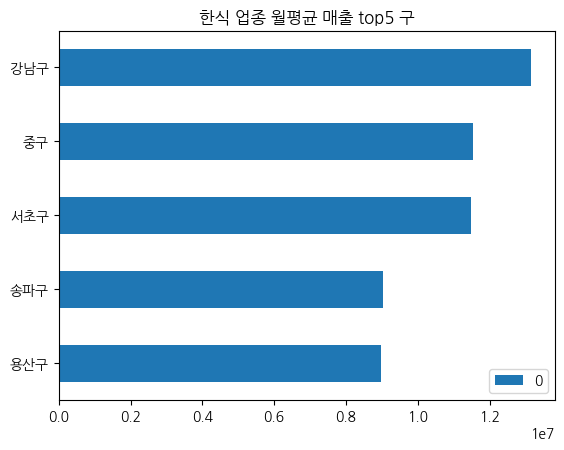

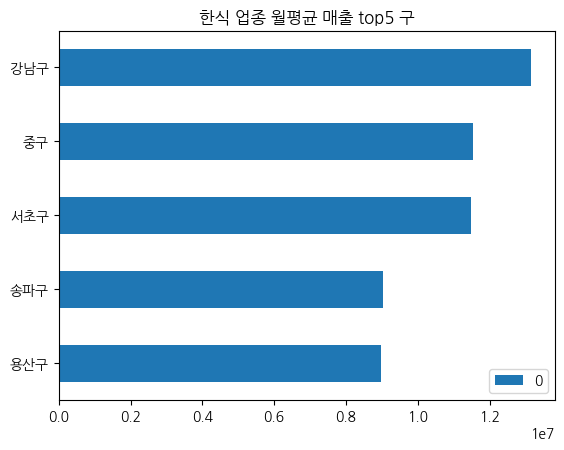

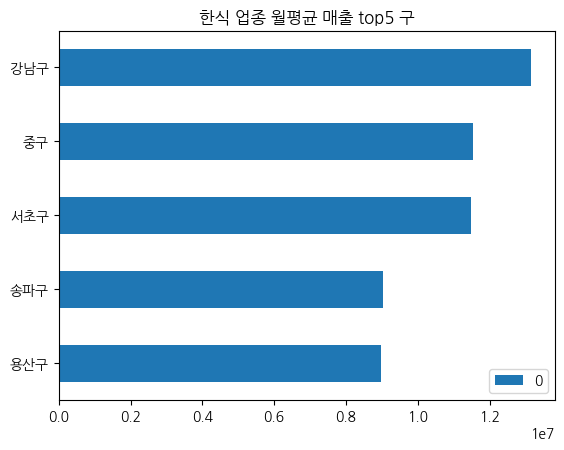

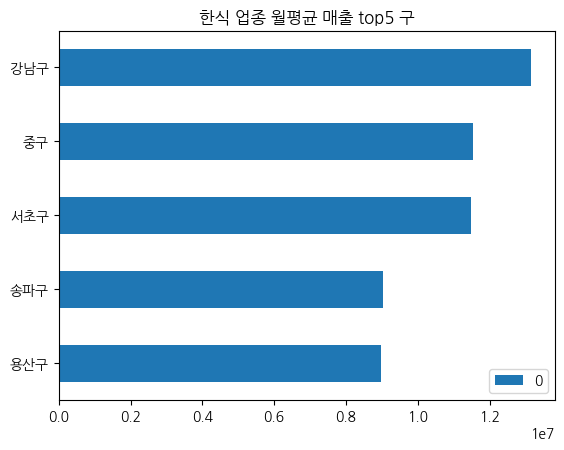

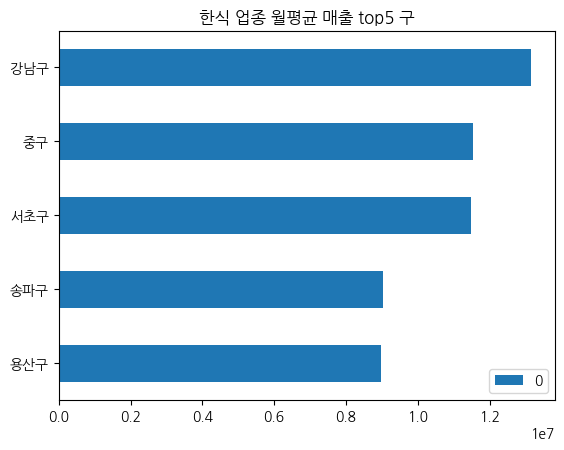

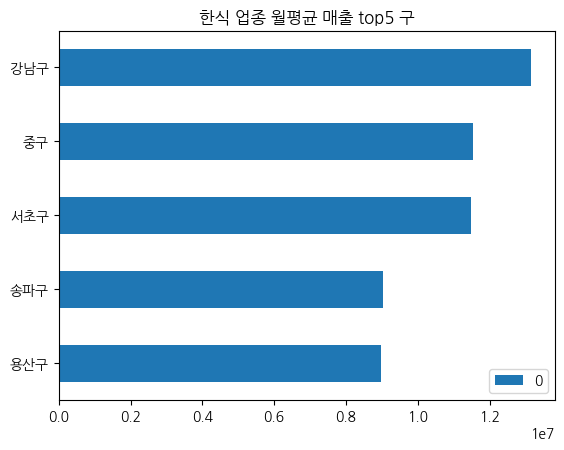

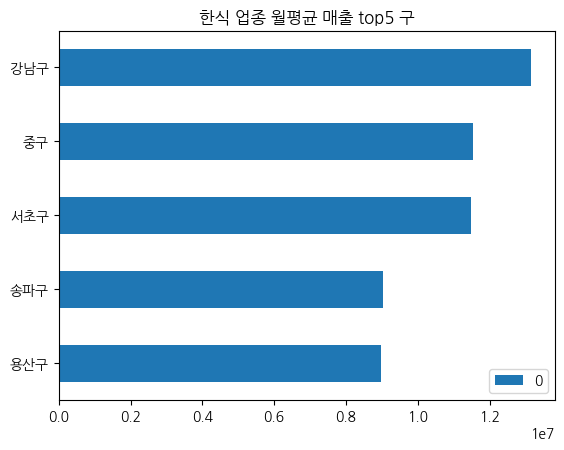

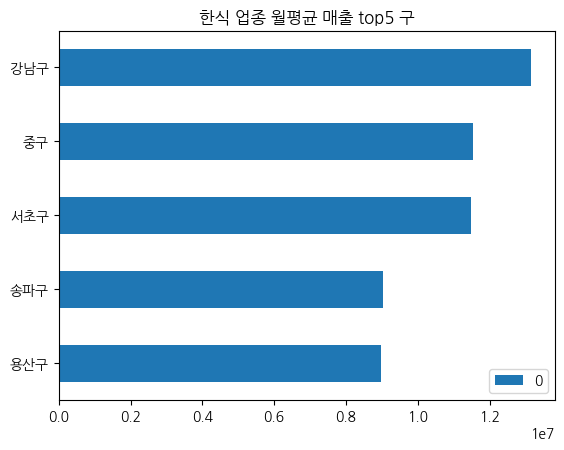

In [31]:
contents = input('원하시는 업종을 선택해 주세요 : ')
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)
get_profit_top(contents)




In [24]:
len(files)

10

In [25]:
df1 = pd.read_csv(files[1])
df1.head()

,기준 년 코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,구,동,lat,lot,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,2021,1,골목상권,왕산로43길,동대문구,청량리동,37.586215,127.046824,2729716,6,7501923026,2151712515,888933146,553108402,1067767035,1166698759,261418507,233074790,865027157,314182715
1,2021,1,골목상권,정릉로27길,성북구,정릉2동,37.605832,127.013541,3355209,7,11842475922,3099929654,1428912815,849935987,1555173516,1968536418,440069908,348552899,1651824332,499540393
2,2021,1,골목상권,정릉로26길,성북구,정릉2동,37.603420,127.012027,3338064,7,6179246740,1683952466,733874296,430168476,826003935,976992453,213755800,182240005,871685006,260574303
3,2021,1,골목상권,장월로1길,월곡2동,상월곡동,37.606097,127.045080,2956757,6,4803914725,1364476852,574723444,344562961,659910597,734715693,163371736,152451762,605566880,204134800
4,2021,1,골목상권,고려대로6길,보문동,보문동4가,37.582954,127.021709,2880113,6,6761967209,1912710946,813803170,519776912,904893308,1040384951,230817641,226201762,820690976,292687543
